In [1]:
import os.path
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import shuffle

In [2]:
if not os.path.isfile('new_blog_spam.txt'):
    f = open("new_blog_spam.txt", 'w', encoding='UTF8')
    for line in open('blog_spam.txt', encoding='UTF8'):
        temp = line.split('\t')

        new_line = '\t'.join(temp[:3]) + '\t' + ' '.join(temp[3:])
        f.write(new_line)
    f.close()

In [7]:
import re
if not os.path.isfile('new_blog_spam2.txt'):
    f = open("new_blog_spam2.txt", 'w', encoding='UTF8')
    for line in open('blog_spam.txt', encoding='UTF8'):
        temp = line.split('\t')
        hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
        
        new_line = '\t'.join(temp[:3]) + '\t' + hangul.sub('', ' '.join(temp[3:]))+'\n'
        f.write(new_line)
    f.close()

In [10]:
from konlpy.tag import Okt

okt = Okt()
if not os.path.isfile('new_blog_spam3.txt'):
    f = open("new_blog_spam3.txt", 'w', encoding='UTF8')
    for line in open('blog_spam.txt', encoding='UTF8'):
        temp = line.split('\t')
        new_text = ''
        for i in range(4, len(temp)):
            new_text += ' ' + ' '.join([t[0] for t in okt.pos(temp[i], norm=True, stem=True)])

        new_line = '\t'.join(temp[:3]) + '\t' + new_text
        f.write(new_line)
    f.close()

c:\users\jimlu\appdata\local\programs\python\python37\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [47]:
from konlpy.tag import Okt

okt = Okt()
if not os.path.isfile('new_blog_spam4.txt'):
    f = open("new_blog_spam4.txt", 'w', encoding='UTF8')
    for line in open('blog_spam.txt', encoding='UTF8'):
        temp = line.split('\t')
        new_text = ''
        for i in range(4, len(temp)):
            new_text += ' ' + ' '.join([t for t in okt.nouns(temp[i])])

        new_line = '\t'.join(temp[:3]) + '\t' + new_text+'\n'
        f.write(new_line)
    f.close()

In [84]:
df = pd.read_csv("new_blog_spam.txt", sep='\t', names=["type", "label", "docid", "docs"])

        length                                                          
         count        mean        std   min    25%    50%    75%     max
label                                                                   
스팸     15000.0  197.563600  89.876486  27.0  145.0  188.0  229.0  1485.0
정상     15000.0   95.600333  55.442172  26.0   60.0   84.0  116.0  1078.0


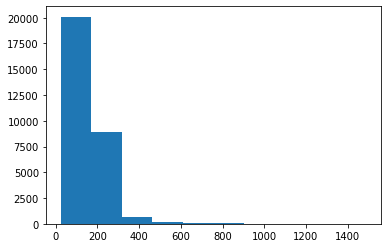

In [85]:
df.loc[df['label'] != '정상', 'label'] = '스팸'
df['length'] = df['docs'].apply(len)
print(df.groupby("label").describe())

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df['length'])
plt.show()


train_set = df[df['type'] == 'tr']
train_set = shuffle(train_set)
test_set = df[df['type'] == 'ts']
test_set = shuffle(test_set)

In [86]:
### 75% 이상의 길이 제거
df.loc[(df['label'] == '정상') & (len(df['docs']) > 116 ), 'docs'] = df.docs.str[:116]
df.loc[(df['label'] == '스팸') & (len(df['docs']) > 229 ), 'docs'] = df.docs.str[:229]
# df.col = df.col.str[:9]

        length                                                         
         count        mean        std   min    25%    50%    75%    max
label                                                                  
스팸     15000.0  178.975667  47.017104  27.0  145.0  188.0  229.0  229.0
정상     15000.0   83.551000  27.099679  26.0   60.0   84.0  116.0  116.0


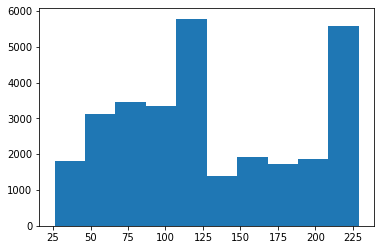

In [87]:
df['length'] = df['docs'].apply(len)
print(df.groupby("label").describe())

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df['length'])
plt.show()


train_set = df[df['type'] == 'tr']
train_set = shuffle(train_set)
test_set = df[df['type'] == 'ts']
test_set = shuffle(test_set)

In [107]:
### Bag of Words 및 나이브 베이즈 활용 분류
cv = CountVectorizer()
bow_transformer = cv.fit(df['docs'])
train_bow = bow_transformer.transform(train_set['docs'])
test_bow = bow_transformer.transform(test_set['docs'])

spam_detect_model = MultinomialNB(alpha=6).fit(train_bow, train_set['label'])

all_predictions = spam_detect_model.predict(train_bow)
print("train score : "+str(spam_detect_model.score(train_bow, train_set['label'])))
print(classification_report(train_set['label'], all_predictions))
confusion_train = confusion_matrix(all_predictions, train_set['label'])
print(pd.DataFrame(data=confusion_train))
print()


print("test score : "+str(spam_detect_model.score(bow_transformer.transform(test_set['docs']), test_set['label'])))
test_predictions = spam_detect_model.predict(test_bow)
print(classification_report(test_set['label'], test_predictions))
confusion_test = confusion_matrix(test_predictions, test_set['label'])
print(pd.DataFrame(data=confusion_test))



train score : 0.95045
              precision    recall  f1-score   support

          스팸       0.94      0.96      0.95     10000
          정상       0.96      0.94      0.95     10000

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000

      0     1
0  9606   597
1   394  9403

test score : 0.9248
              precision    recall  f1-score   support

          스팸       0.91      0.94      0.93      5000
          정상       0.94      0.91      0.92      5000

    accuracy                           0.92     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000

      0     1
0  4703   455
1   297  4545


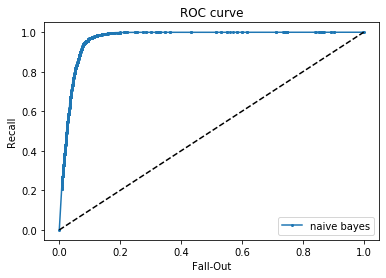

In [33]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(test_set['label'], spam_detect_model.predict_proba(test_bow)[:,1], pos_label='정상')

plt.plot(fpr1, tpr1, 'o-', ms=2, label="naive bayes")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('ROC curve')
plt.show()

In [82]:

##tf-idf 활용
all_bow = bow_transformer.transform(df['docs'])
tfidf_transformer = TfidfTransformer().fit(all_bow)
train_tfidf = tfidf_transformer.transform(train_bow)

tfidf_detect_model = MultinomialNB().fit(train_tfidf, train_set['label'])
tfidf_predictions = tfidf_detect_model.predict(train_tfidf)

print("train score : "+str(tfidf_detect_model.score(train_tfidf, train_set['label'])))

print(classification_report(train_set['label'], tfidf_predictions))
m_confusion_test = confusion_matrix(train_set['label'], tfidf_predictions)
print(pd.DataFrame(data=m_confusion_test))

print('\n')

test_tfidf = tfidf_transformer.transform(test_bow)

test_tfidf_predictions = tfidf_detect_model.predict(test_tfidf)

print("trest score : "+str(tfidf_detect_model.score(test_tfidf, test_set['label'])))

print(classification_report(test_set['label'], test_tfidf_predictions))
test_confusion_matrix = confusion_matrix(test_set['label'], test_tfidf_predictions)
print(pd.DataFrame(data=test_confusion_matrix))

train score : 0.9532
              precision    recall  f1-score   support

          스팸       0.98      0.93      0.95     10000
          정상       0.93      0.98      0.95     10000

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000

      0     1
0  9295   705
1   231  9769


trest score : 0.9229
              precision    recall  f1-score   support

          스팸       0.94      0.90      0.92      5000
          정상       0.90      0.95      0.92      5000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

      0     1
0  4499   501
1   270  4730


In [ ]:
#### SVM 모델 생성

In [ ]:
def binary_classifier(df):
    train_set
    cv = CountVectorizer()
    bow_transformer = cv.fit(train_set['docs'])
    docs_bow = bow_transformer.transform(train_set['docs'])
    docs_test = bow_transformer.transform(df['docs'])

    ### 정상 비정상 분류
    normal_label = np.where(train_set['label'] == '정상', '정상', '비정상')
    normal_detect_model = MultinomialNB(alpha=0).fit(docs_bow, normal_label)
    normal_predictions = normal_detect_model.predict(docs_test)
    normal_selector = []

    for i in range(len(normal_predictions)):
        if normal_predictions[i] == '비정상':
            normal_selector.append(i)

    next_set = df.iloc[normal_selector]

    ### 비정상데이터 Bag of words
    spam_train_set = df[df['label'] != '정상']
    spam_bow_transformer = cv.fit(spam_train_set['docs'])
    spam_docs_bow = spam_bow_transformer.transform(spam_train_set['docs'])
    spam_docs_test = spam_bow_transformer.transform(next_set['docs'])

    ### 대량 비대량 분류
    large_label = np.where(spam_train_set['label'] == '대량', '대량', '비대량')
    large_detect_model = MultinomialNB(alpha=0).fit(spam_docs_bow, large_label)
    large_predictions = large_detect_model.predict(spam_docs_test)

    large_selector = []
    for i in range(len(large_predictions)):
        if large_predictions[i] == '비대량':
            large_selector.append(i)

    next_set = next_set.iloc[large_selector]

    i = 0
    j = 0
    while i < len(normal_predictions):
        if normal_predictions[i] == '비정상':
            normal_predictions[i] = large_predictions[j]
            j += 1
        i += 1

    ### 비대량데이터 Bag of words
    spam_train_set_2 = spam_train_set[spam_train_set['label'] != '대량']
    spam_bow_transformer_2 = cv.fit(spam_train_set_2['docs'])
    spam_docs_bow_2 = spam_bow_transformer_2.transform(spam_train_set_2['docs'])
    spam_docs_test_2 = spam_bow_transformer_2.transform(next_set['docs'])

    ### 불법 합법 분류
    illegal_label = np.where(spam_train_set_2['label'] == '불법', '불법', '합법')
    illegal_detect_model = MultinomialNB(alpha=0).fit(spam_docs_bow_2, illegal_label)
    illegal_predictions = illegal_detect_model.predict(spam_docs_test_2)

    illegal_selector = []
    for i in range(len(illegal_predictions)):
        if illegal_predictions[i] == '합법':
            illegal_selector.append(i)

    next_set = next_set.iloc[illegal_selector]

    i = 0
    j = 0
    while i < len(normal_predictions):
        if normal_predictions[i] == '비대량':
            normal_predictions[i] = illegal_predictions[j]
            j += 1
        i += 1

    ### 비불법데이터 Bag of words
    spam_train_set_3 = spam_train_set_2[spam_train_set_2['label'] != '불법']
    spam_bow_transformer_3 = cv.fit(spam_train_set_3['docs'])
    spam_docs_bow_3 = spam_bow_transformer_3.transform(spam_train_set_3['docs'])
    spam_docs_test_3 = spam_bow_transformer_3.transform(next_set['docs'])

    ### 도배 비도배 분류
    duplicate_label = np.where(spam_train_set_3['label'] == '도배', '도배', '비도배')
    duplicate_detect_model = MultinomialNB(alpha=0).fit(spam_docs_bow_3, duplicate_label)
    duplicate_predictions = duplicate_detect_model.predict(spam_docs_test_3)

    duplicate_selector = []
    for i in range(len(duplicate_predictions)):
        if duplicate_predictions[i] == '비도배':
            duplicate_selector.append(i)

    next_set = next_set.iloc[duplicate_selector]

    i = 0
    j = 0
    while i < len(normal_predictions):
        if normal_predictions[i] == '합법':
            normal_predictions[i] = duplicate_predictions[j]
            j += 1
        i += 1

    ### 비도배데이터 Bag of words
    spam_train_set_4 = spam_train_set_3[spam_train_set_3['label'] != '도배']
    spam_bow_transformer_4 = cv.fit(spam_train_set_4['docs'])
    spam_docs_bow_4 = spam_bow_transformer_4.transform(spam_train_set_4['docs'])
    spam_docs_test_4 = spam_bow_transformer_4.transform(next_set['docs'])

    ### 홍보 여부 분류
    ad_label = np.where(spam_train_set_4['label'] == '홍보', '홍보', '비홍보')
    ad_detect_model = MultinomialNB(alpha=0).fit(spam_docs_bow_4, ad_label)
    ad_predictions = ad_detect_model.predict(spam_docs_test_4)

    ad_selector = []
    for i in range(len(ad_predictions)):
        if ad_predictions[i] == '비홍보':
            ad_selector.append(i)

    next_set = next_set.iloc[ad_selector]

    i = 0
    j = 0
    while i < len(normal_predictions):
        if normal_predictions[i] == '비도배':
            normal_predictions[i] = ad_predictions[j]
            j += 1
        i += 1

    ### 비홍보데이터 Bag of words
    spam_train_set_5 = spam_train_set_4[spam_train_set_4['label'] != '홍보']
    spam_bow_transformer_5 = cv.fit(spam_train_set_5['docs'])
    spam_docs_bow_5 = spam_bow_transformer_5.transform(spam_train_set_5['docs'])
    spam_docs_test_5 = spam_bow_transformer_5.transform(next_set['docs'])

    ### 도박 비도박 분류
    gamble_label = np.where(spam_train_set_5['label'] == '도박', '도박', '비도박')
    gamble_detect_model = MultinomialNB(alpha=0).fit(spam_docs_bow_5, gamble_label)
    gamble_predictions = gamble_detect_model.predict(spam_docs_test_5)

    gamble_selector = []
    for i in range(len(gamble_predictions)):
        if gamble_predictions[i] == '비도박':
            gamble_selector.append(i)

    next_set = next_set.iloc[gamble_selector]

    i = 0
    j = 0
    while i < len(normal_predictions):
        if normal_predictions[i] == '비홍보':
            normal_predictions[i] = gamble_predictions[j]
            j += 1
        i += 1
    print(i)

    ### 비도박데이터 Bag of words
    spam_train_set_6 = spam_train_set_5[spam_train_set_5['label'] != '도박']
    spam_bow_transformer_6 = cv.fit(spam_train_set_6['docs'])
    spam_docs_bow_6 = spam_bow_transformer_6.transform(spam_train_set_6['docs'])
    spam_docs_test_6 = spam_bow_transformer_6.transform(next_set['docs'])

    ### 청소년 유해 여부 분류
    harm_label = np.where(spam_train_set_6['label'] == '청소년유해', '청소년유해', '건전')
    harm_detect_model = MultinomialNB(alpha=0).fit(spam_docs_bow_6, harm_label)
    harm_predictions = harm_detect_model.predict(spam_docs_test_6)

    print(harm_predictions)
    i = 0
    j = 0
    while i < len(normal_predictions):
        if normal_predictions[i] == '비도박':
            normal_predictions[i] = harm_predictions[j]
            j += 1
        i += 1

    return normal_predictions

In [ ]:
def binary_classifier_tfidf(df):
    global bow_transformer
    global docs_bow
    global train_set
    ### 정상 비정상 분류

    cv = CountVectorizer()
    bow_transformer = cv.fit(train_set['docs'])
    docs_bow = bow_transformer.transform(train_set['docs'])
    docs_test = bow_transformer.transform(df['docs'])
    normal_tfidf_transformer = TfidfTransformer().fit(docs_bow)
    normal_docs_tfidf = normal_tfidf_transformer.transform(docs_bow)
    normal_docs_test_tfidf = normal_tfidf_transformer.transform(docs_test)
    normal_label = np.where(train_set['label'] == '정상', '정상', '비정상')
    normal_detect_model = MultinomialNB(alpha=0.0001).fit(normal_docs_tfidf, normal_label)
    normal_predictions = normal_detect_model.predict(normal_docs_test_tfidf)
    normal_selector = []

    for i in range(len(normal_predictions)):
        if normal_predictions[i] == '비정상':
            normal_selector.append(i)

    next_set = df.iloc[normal_selector]
    # print(normal_predictions)
    ### 비정상데이터 Bag of words
    spam_train_set = df[df['label'] != '정상']
    spam_bow_transformer = cv.fit(spam_train_set['docs'])
    spam_docs_bow = spam_bow_transformer.transform(spam_train_set['docs'])
    spam_docs_test = spam_bow_transformer.transform(next_set['docs'])
    spam_tfidf_transformer = TfidfTransformer().fit(spam_docs_bow)
    spam_docs_tfidf = spam_tfidf_transformer.transform(spam_docs_bow)
    spam_docs_test_tfidf = spam_tfidf_transformer.transform(spam_docs_test)

    ### 대량 비대량 분류
    large_label = np.where(spam_train_set['label'] == '대량', '대량', '비대량')
    large_detect_model = MultinomialNB(alpha=0.0001).fit(spam_docs_tfidf, large_label)
    large_predictions = large_detect_model.predict(spam_docs_test_tfidf)
    # print(large_predictions)
    large_selector = []
    for i in range(len(large_predictions)):
        if large_predictions[i] == '비대량':
            large_selector.append(i)

    next_set = next_set.iloc[large_selector]

    i = 0
    j = 0
    while i < len(normal_predictions):
        if normal_predictions[i] == '비정상':
            normal_predictions[i] = large_predictions[j]
            j += 1
        i += 1

    ### 비대량데이터 Bag of words
    spam_train_set_2 = spam_train_set[spam_train_set['label'] != '대량']
    spam_bow_transformer_2 = cv.fit(spam_train_set_2['docs'])
    spam_docs_bow_2 = spam_bow_transformer_2.transform(spam_train_set_2['docs'])
    spam_docs_test_2 = spam_bow_transformer_2.transform(next_set['docs'])
    spam_tfidf_transformer_2 = TfidfTransformer().fit(spam_docs_bow_2)
    spam_docs_tfidf_2 = spam_tfidf_transformer_2.transform(spam_docs_bow_2)
    spam_docs_test_tfidf_2 = spam_tfidf_transformer_2.transform(spam_docs_test_2)

    ### 불법 합법 분류
    illegal_label = np.where(spam_train_set_2['label'] == '불법', '불법', '합법')
    illegal_detect_model = MultinomialNB(alpha=0.0001).fit(spam_docs_tfidf_2, illegal_label)
    illegal_predictions = illegal_detect_model.predict(spam_docs_test_tfidf_2)

    illegal_selector = []
    for i in range(len(illegal_predictions)):
        if illegal_predictions[i] == '합법':
            illegal_selector.append(i)

    next_set = next_set.iloc[illegal_selector]

    i = 0
    j = 0
    while i < len(normal_predictions):
        if normal_predictions[i] == '비대량':
            normal_predictions[i] = illegal_predictions[j]
            j += 1
        i += 1

    ### 비불법데이터 Bag of words
    spam_train_set_3 = spam_train_set_2[spam_train_set_2['label'] != '불법']
    spam_bow_transformer_3 = cv.fit(spam_train_set_3['docs'])
    spam_docs_bow_3 = spam_bow_transformer_3.transform(spam_train_set_3['docs'])
    spam_docs_test_3 = spam_bow_transformer_3.transform(next_set['docs'])
    spam_tfidf_transformer_3 = TfidfTransformer().fit(spam_docs_bow_3)
    spam_docs_tfidf_3 = spam_tfidf_transformer_3.transform(spam_docs_bow_3)
    spam_docs_test_tfidf_3 = spam_tfidf_transformer_3.transform(spam_docs_test_3)

    ### 도배 비도배 분류
    duplicate_label = np.where(spam_train_set_3['label'] == '도배', '도배', '비도배')
    duplicate_detect_model = MultinomialNB(alpha=0.0001).fit(spam_docs_tfidf_3, duplicate_label)
    duplicate_predictions = duplicate_detect_model.predict(spam_docs_test_tfidf_3)

    duplicate_selector = []
    for i in range(len(duplicate_predictions)):
        if duplicate_predictions[i] == '비도배':
            duplicate_selector.append(i)

    next_set = next_set.iloc[duplicate_selector]

    i = 0
    j = 0
    while i < len(normal_predictions):
        if normal_predictions[i] == '합법':
            normal_predictions[i] = duplicate_predictions[j]
            j += 1
        i += 1

    ### 비도배데이터 Bag of words
    spam_train_set_4 = spam_train_set_3[spam_train_set_3['label'] != '도배']
    spam_bow_transformer_4 = cv.fit(spam_train_set_4['docs'])
    spam_docs_bow_4 = spam_bow_transformer_4.transform(spam_train_set_4['docs'])
    spam_docs_test_4 = spam_bow_transformer_4.transform(next_set['docs'])
    spam_tfidf_transformer_4 = TfidfTransformer().fit(spam_docs_bow_4)
    spam_docs_tfidf_4 = spam_tfidf_transformer_4.transform(spam_docs_bow_4)
    spam_docs_test_tfidf_4 = spam_tfidf_transformer_4.transform(spam_docs_test_4)

    ### 홍보 여부 분류
    ad_label = np.where(spam_train_set_4['label'] == '홍보', '홍보', '비홍보')
    ad_detect_model = MultinomialNB().fit(spam_docs_tfidf_4, ad_label)
    ad_predictions = ad_detect_model.predict(spam_docs_test_tfidf_4)

    ad_selector = []
    for i in range(len(ad_predictions)):
        if ad_predictions[i] == '비홍보':
            ad_selector.append(i)

    next_set = next_set.iloc[ad_selector]

    i = 0
    j = 0
    while i < len(normal_predictions):
        if normal_predictions[i] == '비도배':
            normal_predictions[i] = ad_predictions[j]
            j += 1
        i += 1

    ### 비홍보데이터 Bag of words
    spam_train_set_5 = spam_train_set_4[spam_train_set_4['label'] != '홍보']
    spam_bow_transformer_5 = cv.fit(spam_train_set_5['docs'])
    spam_docs_bow_5 = spam_bow_transformer_5.transform(spam_train_set_5['docs'])
    spam_docs_test_5 = spam_bow_transformer_5.transform(next_set['docs'])
    spam_tfidf_transformer_5 = TfidfTransformer().fit(spam_docs_bow_5)
    spam_docs_tfidf_5 = spam_tfidf_transformer_5.transform(spam_docs_bow_5)
    spam_docs_test_tfidf_5 = spam_tfidf_transformer_5.transform(spam_docs_test_5)

    ### 도박 비도박 분류
    gamble_label = np.where(spam_train_set_5['label'] == '도박', '도박', '비도박')
    gamble_detect_model = MultinomialNB().fit(spam_docs_tfidf_5, gamble_label)
    gamble_predictions = gamble_detect_model.predict(spam_docs_test_tfidf_5)

    gamble_selector = []
    for i in range(len(gamble_predictions)):
        if gamble_predictions[i] == '비도박':
            gamble_selector.append(i)
            print(i)

    next_set = next_set.iloc[gamble_selector]

    i = 0
    j = 0
    while i < len(normal_predictions):
        if normal_predictions[i] == '비홍보':
            normal_predictions[i] = gamble_predictions[j]
            j += 1
        i += 1

    ### 비도박데이터 Bag of words
    print(spam_train_set_5)
    spam_train_set_6 = spam_train_set_5[spam_train_set_5['label'] != '도박']
    spam_bow_transformer_6 = cv.fit(spam_train_set_6['docs'])
    spam_docs_bow_6 = spam_bow_transformer_6.transform(spam_train_set_6['docs'])
    spam_docs_test_6 = spam_bow_transformer_6.transform(next_set['docs'])
    spam_tfidf_transformer_6 = TfidfTransformer().fit(spam_docs_bow_6)
    spam_docs_tfidf_6 = spam_tfidf_transformer_6.transform(spam_docs_bow_6)
    spam_docs_test_tfidf_6 = spam_tfidf_transformer_6.transform(spam_docs_test_6)

    ### 청소년 유해 여부 분류
    harm_label = np.where(spam_train_set_6['label'] == '청소년유해', '청소년유해', '건전')
    print(harm_label)
    harm_detect_model = MultinomialNB().fit(spam_docs_tfidf_6, harm_label)
    harm_predictions = harm_detect_model.predict(spam_docs_test_tfidf_6)

    print(harm_predictions)
    i = 0
    j = 0
    print(normal_predictions)
    while i < len(normal_predictions):
        if normal_predictions[i] == '비도박':
            normal_predictions[i] = harm_predictions[j]
            j += 1
        i += 1

    return normal_predictions

In [ ]:
def binary_classifier_ovr(df):
    cv = CountVectorizer()
    bow_transformer = cv.fit(train_set['docs'])
    docs_bow = bow_transformer.transform(train_set['docs'])

    ### 정상 비비정상 분류
    normal_label = np.where(train_set['label'] == '정상', '정상', '비정상')
    normal_detect_model = MultinomialNB().fit(docs_bow, normal_label)

    ### 대량 비대량 분류
    large_label = np.where(train_set['label'] == '대량', '대량', '비대량')
    large_detect_model = MultinomialNB().fit(docs_bow, large_label)

    ### 불법 합법 분류
    illegal_label = np.where(train_set['label'] == '불법', '불법', '합법')
    illegal_detect_model = MultinomialNB().fit(docs_bow, illegal_label)

    ### 도배 비도배 분류
    duplicate_label = np.where(train_set['label'] == '도배', '도배', '비도배')
    duplicate_detect_model = MultinomialNB().fit(docs_bow, duplicate_label)

    ### 홍보 여부 분류
    ad_label = np.where(train_set['label'] == '홍보', '홍보', '비홍보')
    ad_detect_model = MultinomialNB().fit(docs_bow, ad_label)

    ### 도박 비도박 분류
    gamble_label = np.where(train_set['label'] == '도박', '도박', '비도박')
    gamble_detect_model = MultinomialNB().fit(docs_bow, gamble_label)

    ### 청소년 유해 여부 분류
    harm_label = np.where(train_set['label'] == '청소년유해', '청소년유해', '건전')
    harm_detect_model = MultinomialNB().fit(docs_bow, harm_label)

    normal_predictions = []
    for index, row in df.iterrows():
        normal_label_test = np.where(df['label'] == '정상', '정상', '비정상')

        normal_score = normal_detect_model.score(bow_transformer.transform(row['docs'], normal_label_test[index]))
        print(normal_score)

    return normal_predictions


print(classification_report(test_set['label'], binary_classifier(test_set)))
print(classification_report(test_set['label'], binary_classifier_tfidf(test_set)))
# print(classification_report(test_set['label'], binary_classifier_ovr(test_set)))